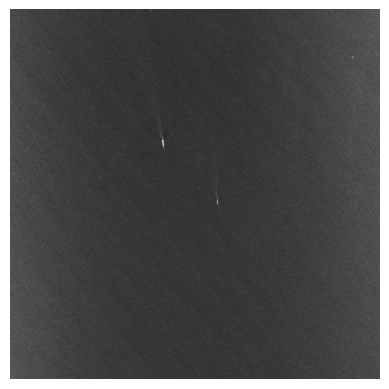

In [2]:
import cv2
import os
import matplotlib.pyplot as plt

# Define the image path
image_path = 'C:\\Users\\G_BOOTS\\Desktop\\PROJECTS\\ff\\images\\0001.jpg'

# Check if the file exists
if not os.path.exists(image_path):
    print(f"Error: The file at {image_path} does not exist.")
else:
    # Try to read the image
    image = cv2.imread(image_path)
    
    # Check if the image was successfully loaded
    if image is None:
        print(f"Error: Failed to load the image at {image_path}.")
    else:
        # Convert the image from BGR to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Display the image using matplotlib
        plt.imshow(image_rgb)
        plt.axis('off')  # Hide axes for better display
        plt.show(5)


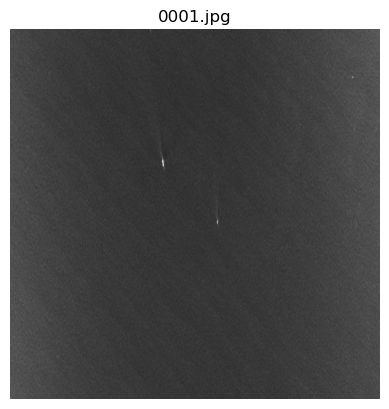

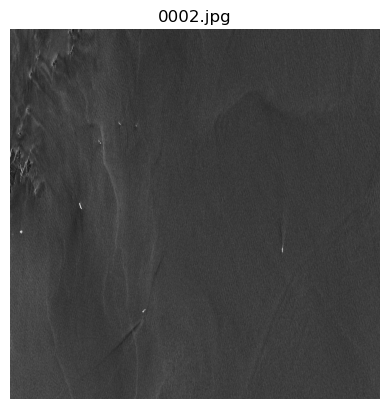

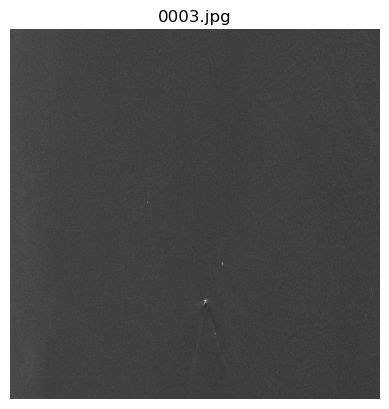

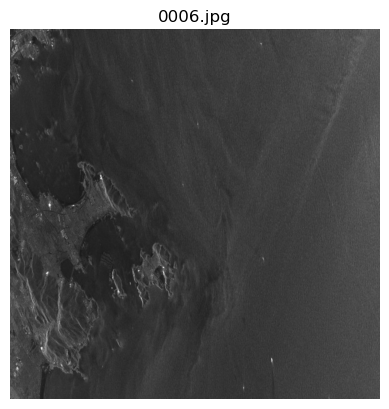

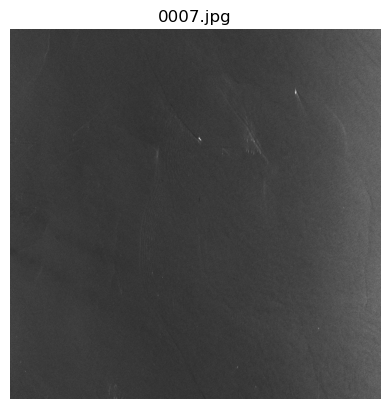

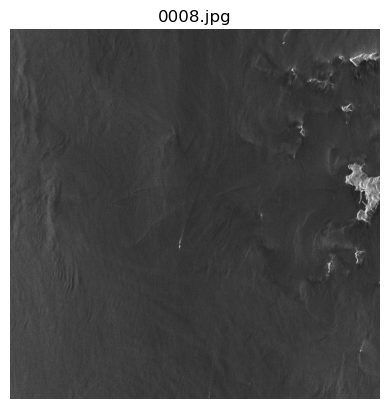

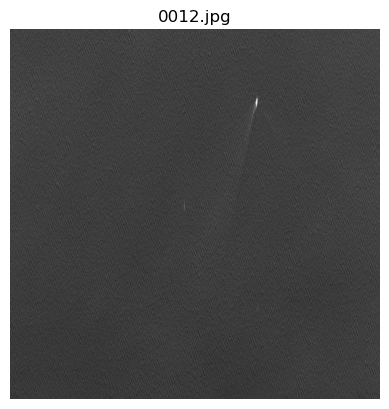

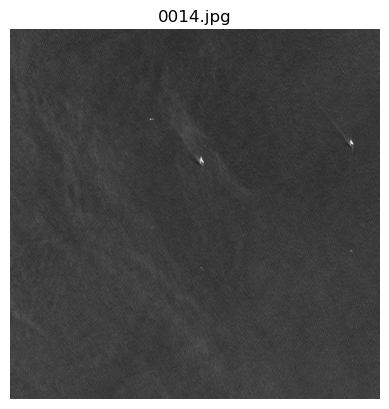

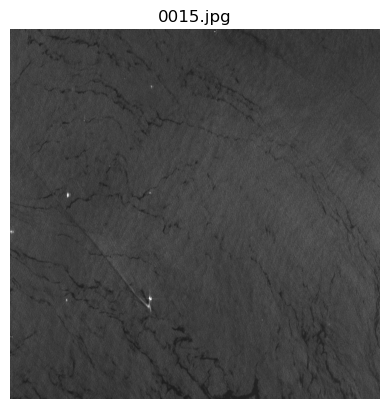

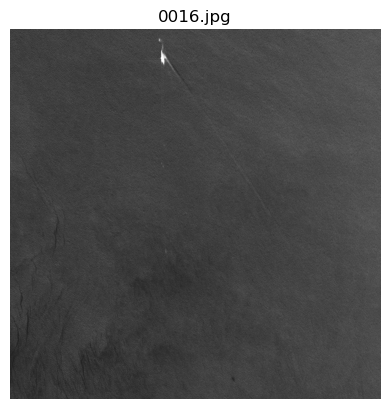

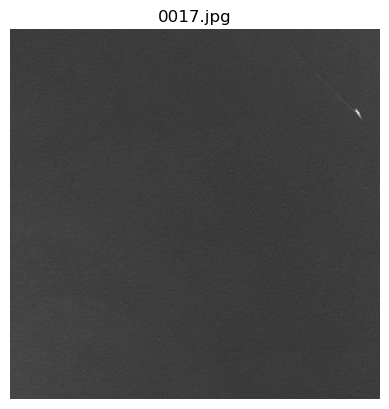

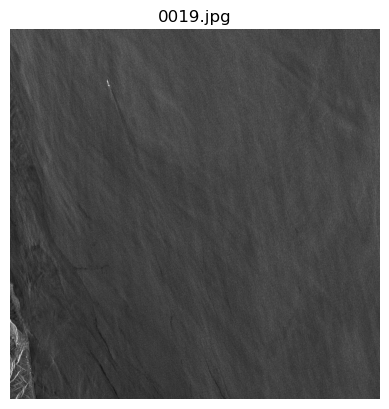

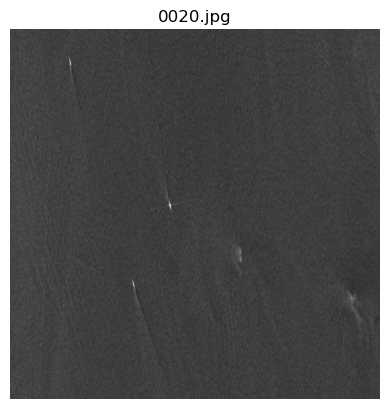

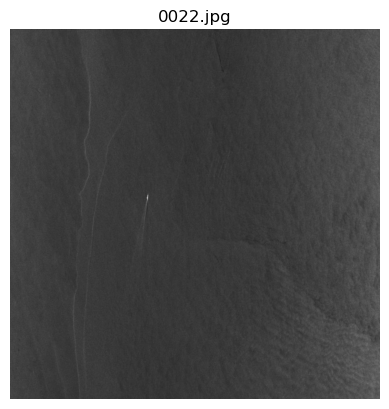

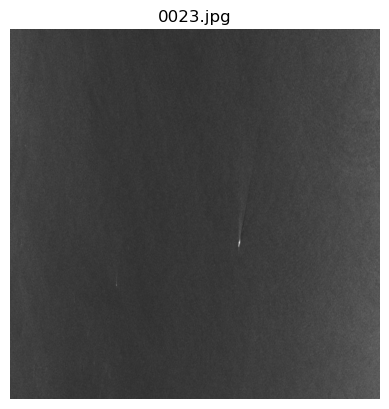

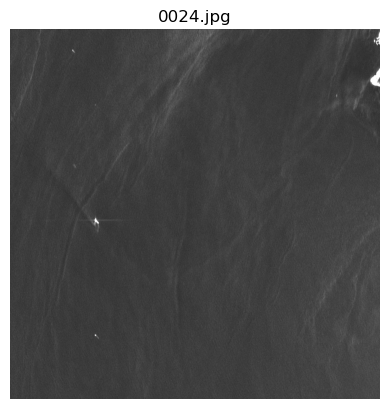

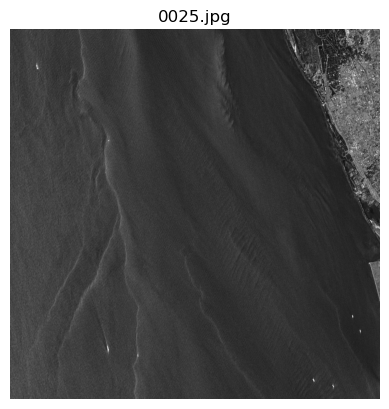

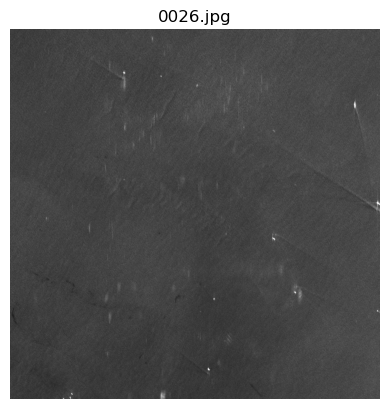

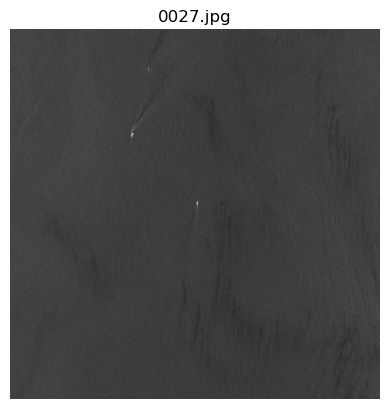

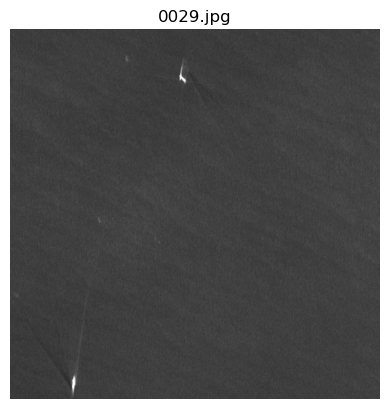

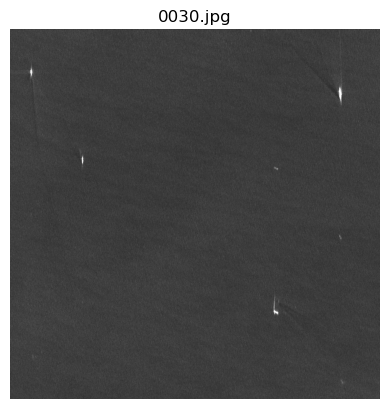

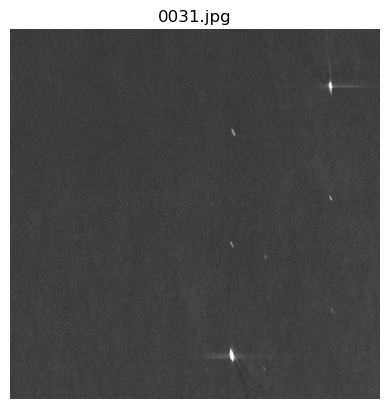

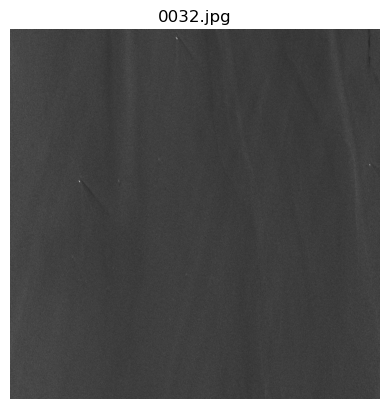

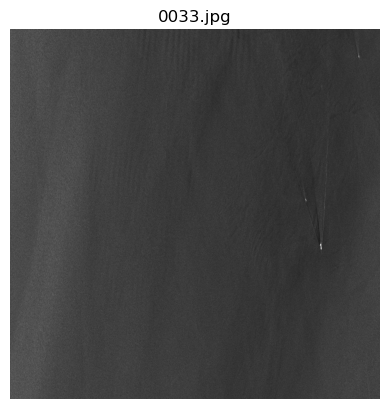

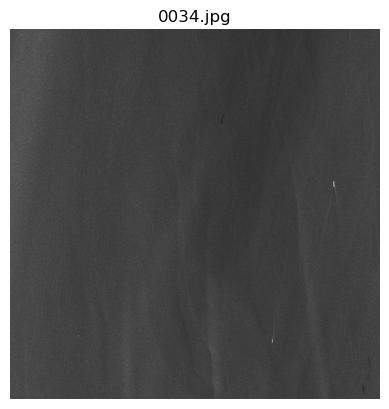

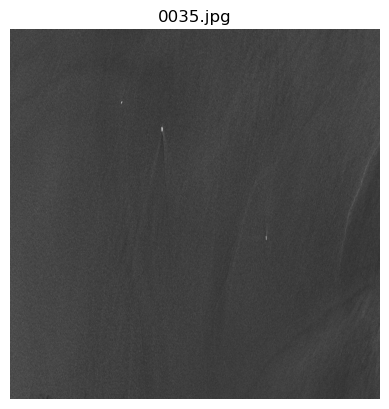

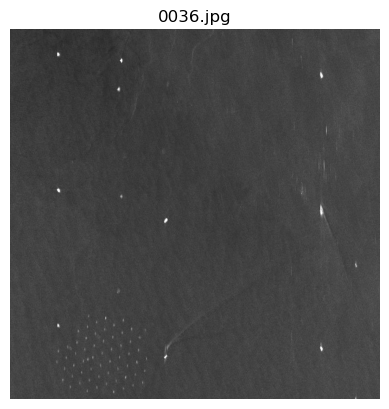

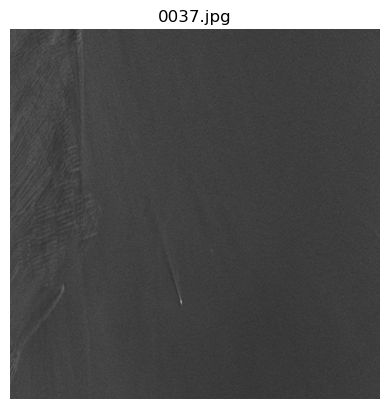

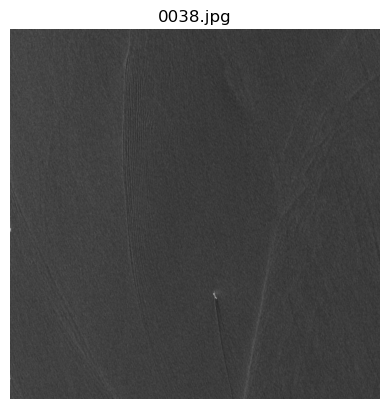

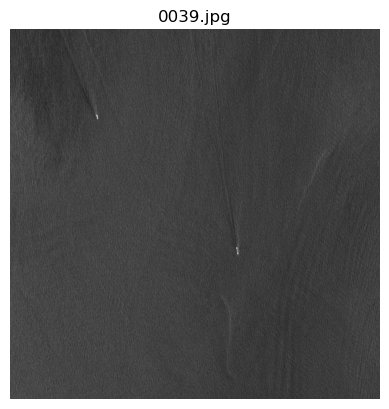

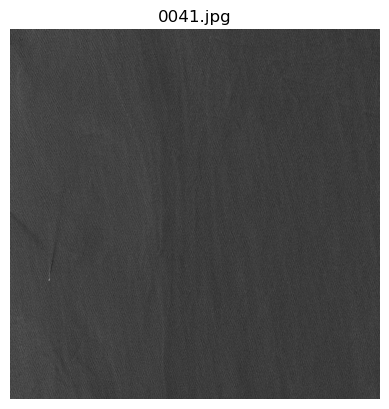

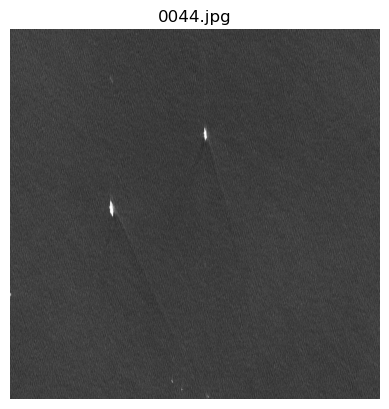

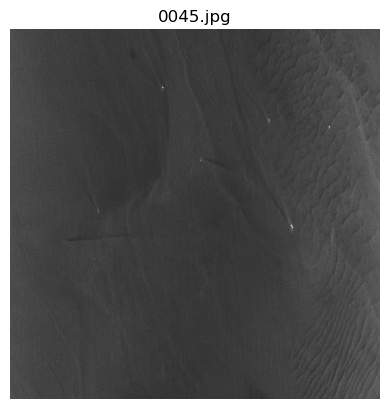

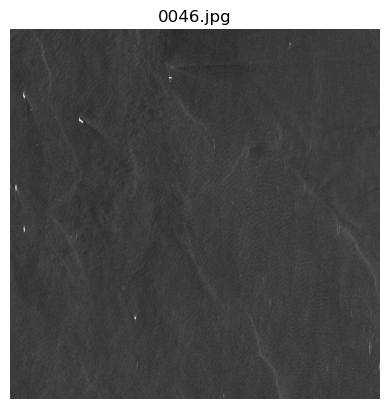

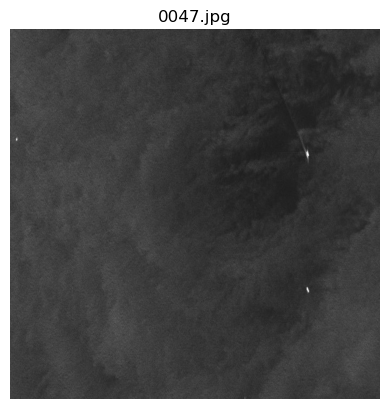

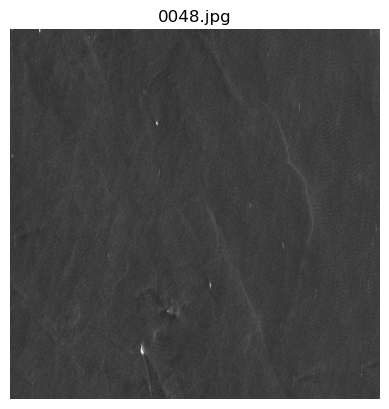

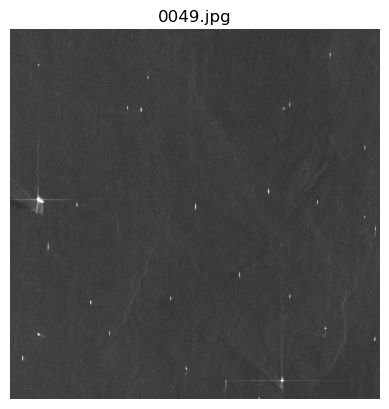

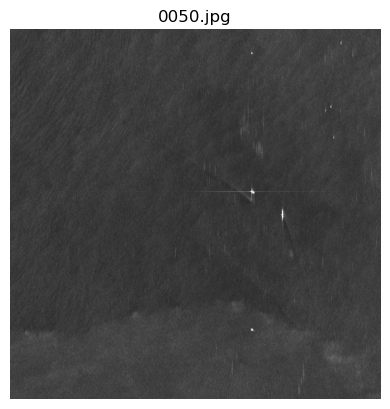

In [5]:
import cv2
import os
import matplotlib.pyplot as plt

# Define the image directory
image_dir = 'C:\\Users\\G_BOOTS\\Desktop\\PROJECTS\\ff\\images'

# Check if the directory exists
if not os.path.exists(image_dir):
    print(f"Error: The directory at {image_dir} does not exist.")
else:
    # Get a list of all files in the directory
    files = os.listdir(image_dir)
    
    # Filter out only image files (assuming they have .jpg extension, adjust as necessary)
    image_files = [f for f in files if f.endswith('.jpg')]
    
    # Check if there are any image files in the directory
    if not image_files:
        print(f"No image files found in the directory {image_dir}.")
    else:
        # Iterate over each image file
        for image_file in image_files:
            image_path = os.path.join(image_dir, image_file)
            
            # Try to read the image
            image = cv2.imread(image_path)
            
            # Check if the image was successfully loaded
            if image is None:
                print(f"Error: Failed to load the image at {image_path}.")
                continue  # Skip to the next image
            
            # Convert the image from BGR to RGB
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Display the image using matplotlib
            plt.imshow(image_rgb)
            plt.axis('off')  # Hide axes for better display
            plt.title(image_file)  # Optional: display the filename as the title
            plt.show()


In [4]:
# Generate Superpixels

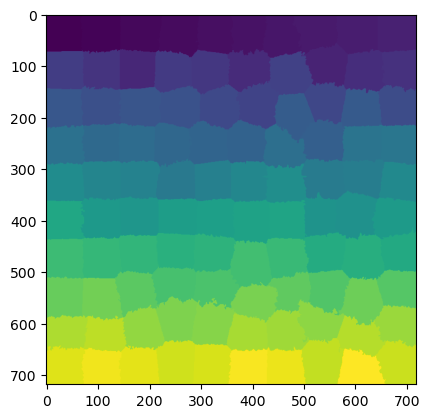

In [13]:
from skimage.segmentation import slic
from skimage.util import img_as_float

image = img_as_float(image)
segments = slic(image, n_segments=100, compactness=10, sigma=1)

plt.imshow(segments)
plt.show()


Parameters:
n_segments: Number of superpixels.
compactness: Balances color proximity and space proximity.
sigma: Width of Gaussian smoothing.

In [14]:
import numpy as np

def extract_superpixel_features(image, segments):
    features = []
    for segment_value in np.unique(segments):
        mask = segments == segment_value
        superpixel = image[mask]
        
        # Color features
        mean_color = np.mean(superpixel, axis=0)
        var_color = np.var(superpixel, axis=0)
# Here, you can add texture and shape features as well
        
        features.append(np.concatenate([mean_color, var_color]))
    return np.array(features)

features = extract_superpixel_features(image, segments)

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Example: Generate a synthetic dataset
# Features (X) could be a 2D array where each row is a sample and each column is a feature
# Labels (y) is a 1D array where each element is the label for the corresponding sample
features = np.random.rand(100, 5)  # 100 samples, 5 features each
labels = np.random.randint(2, size=100)  # Binary classification (0 or 1)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 53.33%


In [24]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.85      0.59        13
           1       0.67      0.24      0.35        17

    accuracy                           0.50        30
   macro avg       0.56      0.54      0.47        30
weighted avg       0.58      0.50      0.45        30



In [11]:
def detect_objects(image, model):
    segments = slic(image, n_segments=100, compactness=10, sigma=1)
    features = extract_superpixel_features(image, segments)
    predictions = model.predict(features)
    return segments, predictions

segments, predictions = detect_objects(image, model)

ValueError: X has 6 features, but RandomForestClassifier is expecting 5 features as input.